In [14]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install -U yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [4]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Building a classification model to predict if a person has diabetes or not

In [5]:
diabetes_corr = diabetes.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


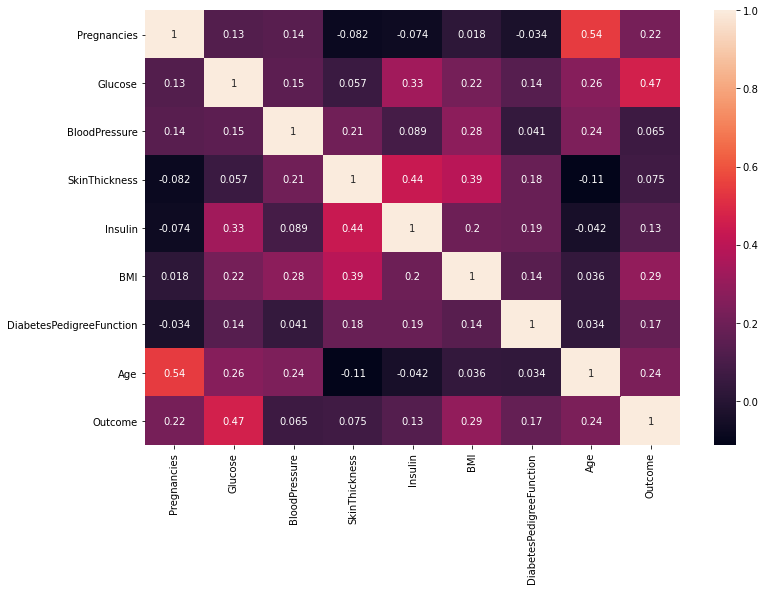

In [7]:
# Visualising correlations between features using heatmap
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(diabetes_corr, annot=True)
plt.show()

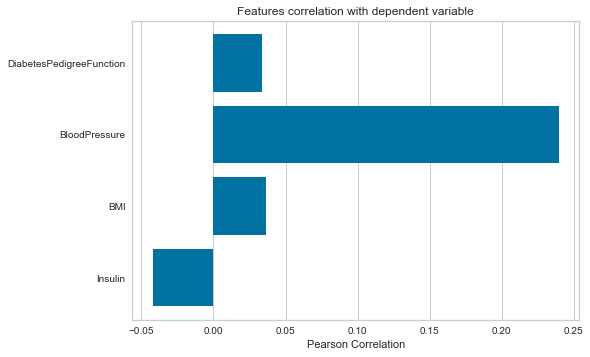

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [15]:
# Visualising correlations between features using yellowbrick
X=diabetes[['Insulin', 'BMI','BloodPressure','DiabetesPedigreeFunction']]
Y = diabetes['Age']
from yellowbrick.target import FeatureCorrelation
visualiser = FeatureCorrelation(labels = X.columns, method='pearson')
visualiser.fit(X,Y)
visualiser.poof()

In [19]:
corr_score_df = pd.DataFrame({'Feature_names' : visualiser.features_,'Score' : visualiser.scores_})
corr_score_df

,Feature_names,Score
0,Insulin,-0.042163
1,BMI,0.036242
2,BloodPressure,0.239528
3,DiabetesPedigreeFunction,0.033561


In [30]:
X = diabetes.drop('Outcome',axis=1)
Y = diabetes['Outcome']

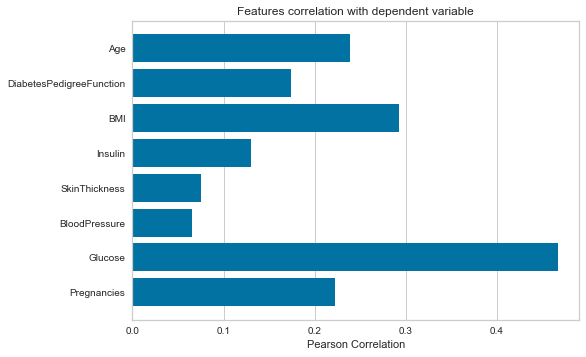

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [37]:
# visulaiser = FeatureCorrelation(labels = X.columns, method='pearson')
# visualiser.fit(X,Y)
# visualiser.poof()
visualizer = FeatureCorrelation(labels=X.columns, method='pearson')
visualizer.fit(X, Y)
visualizer.poof()

## Caculating correlations using mutual information

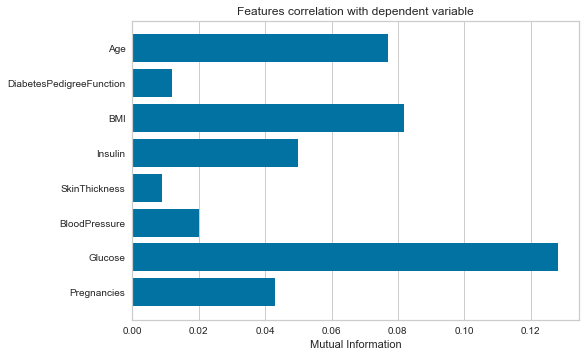

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [41]:
discrete_features = [False for _ in range(len(X.columns))]
discrete_features[0] = True
visualizer = FeatureCorrelation(method='mutual_info-classification', labels=X.columns)
visualizer.fit(X,Y,discrete_features=discrete_features, random_state=0)
visualizer.poof()